## INSTALLATIONS/IMPORTS

In [1]:
# !pip install ucimlrepo # uncomment to install

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## IMPORT DATASET

In [3]:
from sklearn.datasets import fetch_openml

adult = fetch_openml("adult", version=2, as_frame=True, parser='auto')
data = adult.frame

C:\Users\kingh\miniconda3\envs\cse2107\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## DATA CLEANING

In [4]:
# drop all samples with missing information
data.dropna(inplace=True)
data.drop('education', axis=1, inplace=True)
data.drop('fnlwgt', axis=1, inplace=True)

## EDA

### Descriptive Statistics

In [5]:
# numerical features
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# categorical features
data.select_dtypes(include='category').describe()

,workclass,marital-status,occupation,relationship,race,sex,native-country,class
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,7,14,6,5,2,41,2
top,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,21055,6020,18666,38903,30527,41292,34014


### Visualizations

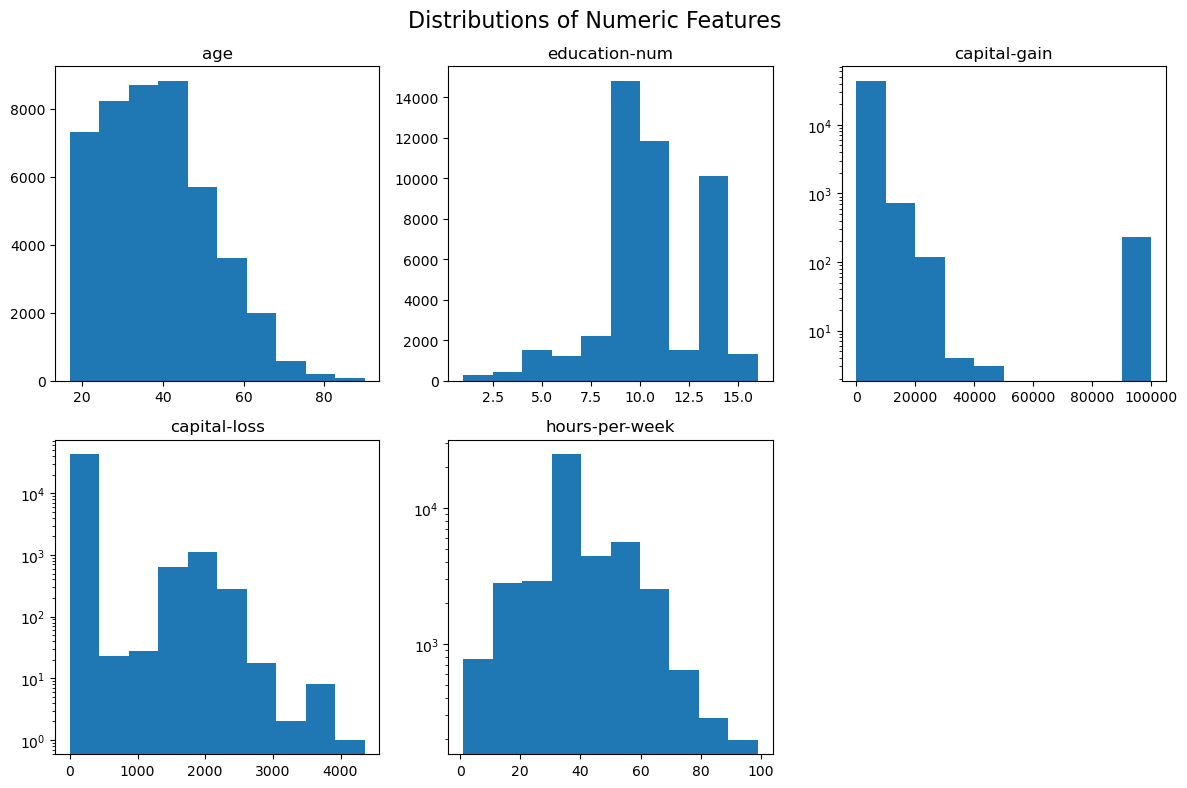

In [7]:
# histograms for numerical features

numeric_features = data.select_dtypes(include=['number']).columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

fig.delaxes(axes[-1])

for i, col in enumerate(numeric_features):
    axes[i].hist(data[col])
    # log-scaling for features with wider range
    if i in [2, 3, 4]:
        axes[i].set_yscale('log')
    axes[i].set_title(col)

fig.suptitle('Distributions of Numeric Features', fontsize=16)
plt.tight_layout()

# uncomment to export figure
# fig.savefig('histograms.png')

plt.show()

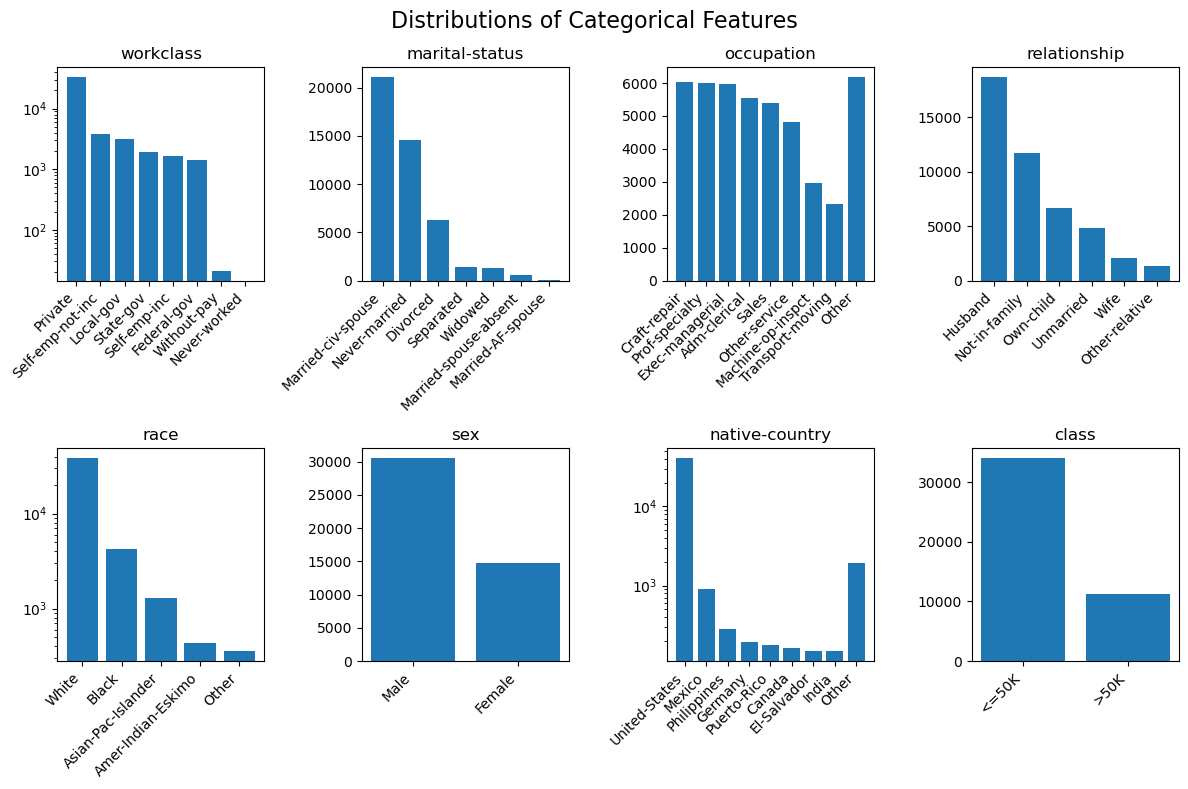

In [8]:
# bar plots for categorical features

# extract categorical features
categorical_features = data.select_dtypes(include=['category']).columns.tolist()

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    counts = data[col].value_counts()
    
    # for features with relatively few categories, we display counts for all categories
    if data[col].nunique() <= 10:
        axes[i].bar(counts.index.astype(str), counts.values)
        axes[i].set_title(col)
        axes[i].set_xticks(range(len(counts)))
        axes[i].set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
        
    # for features with more categories, we display top 8 and create an "other" aggregate category
    else:
        top_counts = counts.head(8)
        other_sum = counts.iloc[8:].sum()
        top_counts_with_other = pd.concat([top_counts, pd.Series({'Other': other_sum})])
        axes[i].bar(top_counts_with_other.index.astype(str), top_counts_with_other.values)
        axes[i].set_title(col)
        axes[i].set_xticks(range(len(top_counts_with_other)))
        axes[i].set_xticklabels(top_counts_with_other.index.astype(str), rotation=45, ha='right')

    # log-scaling for features where data is very localized
    if i in [0, 4, 6]:
            axes[i].set_yscale('log')

fig.suptitle('Distributions of Categorical Features', fontsize=16)
plt.tight_layout()

# uncomment to export figure
# fig.savefig('barplots.png')

plt.show()

## Pre-Processing

In [9]:
# creating age group categorical variable
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data = data.drop('age', axis=1)

In [10]:
# binary classification problem
data_b = data.copy()
target = 'class'
data_b[target] = data_b.pop(target)
data_b.to_csv('data_bc.csv', index=False) # export data to csv

In [11]:
# multi-class classification problem
data_m = data.copy()
target = 'age_group'
data_m[target] = data_m.pop(target)
data_m.to_csv('data_mc.csv', index=False) # export data to csv